# Load data

In [25]:
import pandas as pd
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')
train_data.info()
train_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


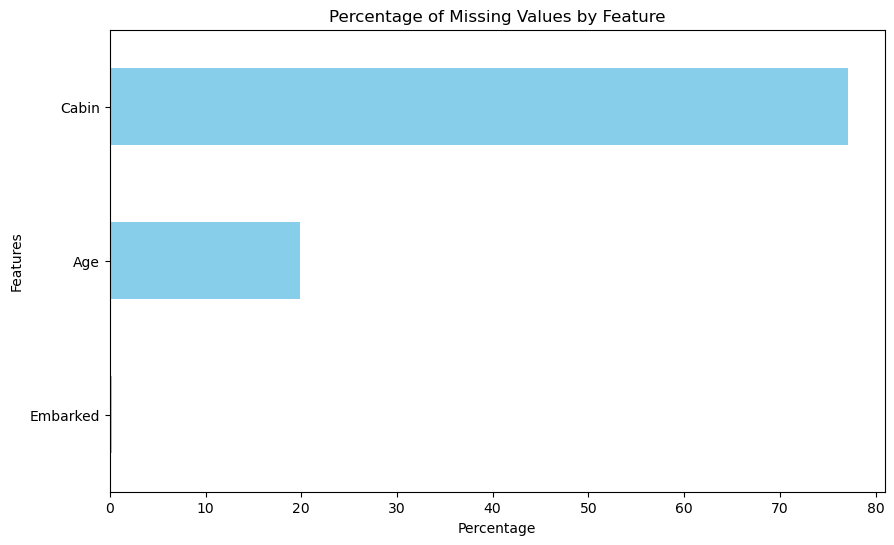

In [26]:
import matplotlib.pyplot as plt
# 列ごとの欠損割合を計算
missing_percent = train_data.isnull().mean() * 100

# 欠損のある列をフィルタリング
missing_percent = missing_percent[missing_percent > 0]

# 欠損値の割合を可視化
missing_percent.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Percentage of Missing Values by Feature")
plt.xlabel("Percentage")
plt.ylabel("Features")
plt.show()


In [27]:
# 欠損値の処理
# [1] replace mean in column of Age
# [2] replace most frequent value in column of Embarked
most_frequent_value = train_data['Embarked'].mode()[0]
train_data.fillna({
            'Age':train_data['Age'].mean(),
            'Embarked':most_frequent_value
        },
        inplace=True
    )

# [3] drop Cabin
# Cabinの欠損率を確認
missing_rate = train_data['Cabin'].isnull().mean() * 100
print(f"Cabin の欠損率: {missing_rate:.2f}%")
train_data.drop(columns=['Cabin'], inplace=True)



Cabin の欠損率: 77.10%


In [29]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
